In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

<h1 style='color:blue;' align='center'>LogisticRegression</h1>

In [7]:
data=pd.read_csv('data.csv',sep=",")

In [3]:
data.shape

(303, 14)

In [9]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
train_data,test_data=train_test_split(data,test_size=0.3,random_state=1)

In [6]:
train_data.shape

(212, 14)

In [7]:
test_data.shape

(91, 14)

**Fitting and Training the model**
***Preparing the data***

In [8]:

x_train=train_data.iloc[:,0:13]
x_test=test_data.iloc[:,0:13]

y_train=train_data.iloc[:,13]
y_test=test_data.iloc[:,13]

**Defining Models (L1 penalty aka Lasso Penalty)**


In [9]:

LR1=linear_model.LogisticRegression(random_state=0,solver='liblinear',multi_class='ovr',penalty='l1',C=0.1)

**L2 penalty aka Ridge Penalty**


In [10]:
LR2=linear_model.LogisticRegression(random_state=0,solver='lbfgs',multi_class='ovr',penalty='l2',C=0.1)

In [11]:
LR1.fit(X=x_train,y=y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [12]:
LR2.fit(X=x_train,y=y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

In [13]:
y_pred1=LR1.predict(x_test)
y_pred2=LR2.predict(x_test)

**Accuracy Score by l1 Penalty logistic regresion**

In [14]:
score1=LR1.score(x_test,y_test)
print(score1)

0.7362637362637363


In [15]:
cm1=metrics.confusion_matrix(y_test,y_pred1)
print(cm1)

[[29 12]
 [12 38]]


**Accuracy Score by l2 Penalty logistic regresion**

In [16]:
score2=LR2.score(x_test,y_test)
print(score2)

0.7802197802197802


In [17]:
cm2=metrics.confusion_matrix(y_test,y_pred2)
print(cm2)

[[29 12]
 [ 8 42]]


<h1 style='color:blue;' align='center'>DecisionTreeClassifier</h1>

In [10]:
train_data,test_data=train_test_split(data,test_size=0.3,random_state=1)

In [11]:
train_data.shape

(212, 14)

In [12]:
test_data.shape

(91, 14)

In [13]:
x_train=train_data.iloc[:,0:13]
x_test=test_data.iloc[:,0:13]

y_train=train_data.iloc[:,13]
y_test=test_data.iloc[:,13]

In [16]:
'''Defining Models'''
clf=DecisionTreeClassifier(criterion='entropy',random_state=0,min_samples_leaf=10,min_samples_split=10)
clf.fit(X=x_train,y=y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=10,
                       min_samples_split=10, random_state=0)

In [18]:
#clf with gini coefficient
clf.gini=DecisionTreeClassifier(criterion='gini',random_state=0,min_samples_leaf=10,min_samples_split=10)
clf.gini.fit(X=x_train,y=y_train)

DecisionTreeClassifier(min_samples_leaf=10, min_samples_split=10,
                       random_state=0)

In [19]:
y_pred1=clf.predict(x_test)
y_pred2=clf.gini.predict(x_test)

In [20]:
#Accuracy score by entropy
score1=clf.score(x_test,y_test)
print(score1)

0.7362637362637363


In [21]:
cm1=metrics.confusion_matrix(y_test,y_pred1)
print(cm1)

[[28 13]
 [11 39]]


In [23]:
score2=clf.gini.score(x_test,y_test)
print(score2)

0.6703296703296703


In [24]:
cm2=metrics.confusion_matrix(y_test,y_pred2)
print(cm2)

[[29 12]
 [18 32]]


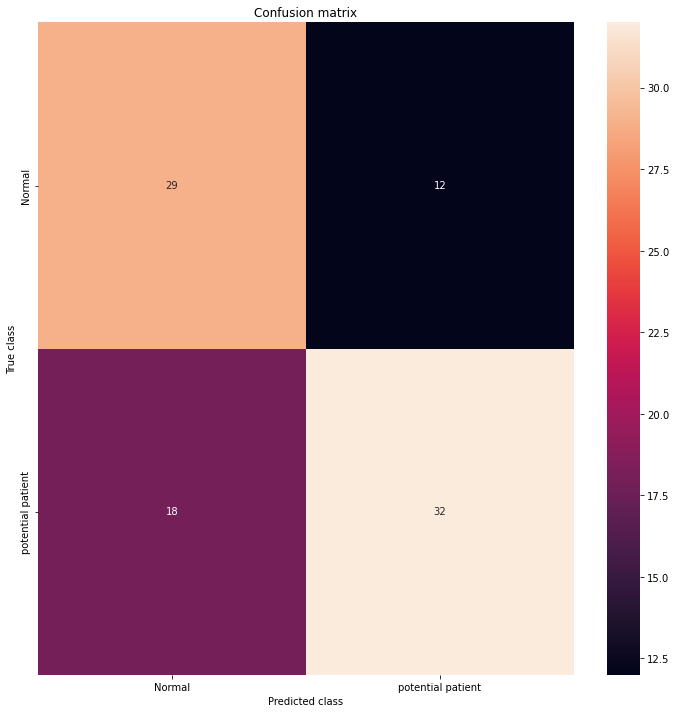

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
LABELS = ["Normal", "potential patient"]
plt.figure(figsize=(12, 12))
sns.heatmap(cm2, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()
